# Denver Crime Starter

This notebook is intended to act as a starter for participants in the 4th Paradigm Denver Crime Data Science Project. If you haven't done so already, please consult the [*Project setup*](https://github.com/the4thparadigm/hitchhikers_guide/tree/master/ds_projects/project_set_up) section of the Hitchhiker's Guide and the [*Getting started*](https://github.com/dawsoneliasen/denvercrime#getting-started) section of the project README on GitHub. 

## Packages
There are several standard packages that will be used in almost every data science project. These packages aren't built in to Python, so you must import these packages to utilize them. The packages we are using for this exercise are:
* numpy: provides linear algebra (required for pandas and matplotlib)
* matplotlib: provides visualization functionality
* pandas: provides convenient structures for organizing data (Series, DataFrame) and file I/O
* seaborn: a beautification layer on top of matplotlib

Run the code cell below to import these packages.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

## Load Configuration Files

Let's load the configuration file, which allows us to easily load data and output results

In [15]:
from denvercrime.src.utils.config_loader import get_config
conf = get_config()

## Importing data

The next thing you need to do is import the data into the notebook. If you haven't already done so, make sure to download the denver crime data, unzip it into data/raw/(see the [*Getting started*](https://github.com/dawsoneliasen/denvercrime#getting-started) section of the project README). Then, give accesst the csv by running `chmod 700 data/raw/crime.csv`. Let's take the data out from the .csv and put it in a pandas dataframe.

In [16]:
#df = pd.read_csv('../data/raw/crime.csv', engine='python')
df = pd.read_csv(os.path.join(conf.dirs.data.raw, "crime.csv"))
df.dataframeName = 'crime.csv'

Now that the data are imported, let's print out a small portion of the dataframe to see what it looks like. 

In [17]:
df.head(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0


## Making a visualization
To start building an intuition of what we're dealing with, let's investigate the frequency of various types of offenses. The OFFENSE_CATEGORY_ID column provides the category of each offense.

In [18]:
# we're only interested in one column - let's pull it out as a separate dataframe
column = df.loc[:, 'OFFENSE_CATEGORY_ID']

# once again, we can use head to take a look
column.head(5)

0            all-other-crimes
1                     larceny
2    theft-from-motor-vehicle
3                     larceny
4                     larceny
Name: OFFENSE_CATEGORY_ID, dtype: object

In [19]:
# we can get the count of each category by calling value_counts() on the column
counts = column.value_counts()
# counts is a Series object (value_counts() returns a Series object); 
# in this case, a series of counts associated with values for offense_category_id
counts.head(5)

traffic-accident            119356
all-other-crimes             84031
public-disorder              48223
larceny                      46099
theft-from-motor-vehicle     33944
Name: OFFENSE_CATEGORY_ID, dtype: int64

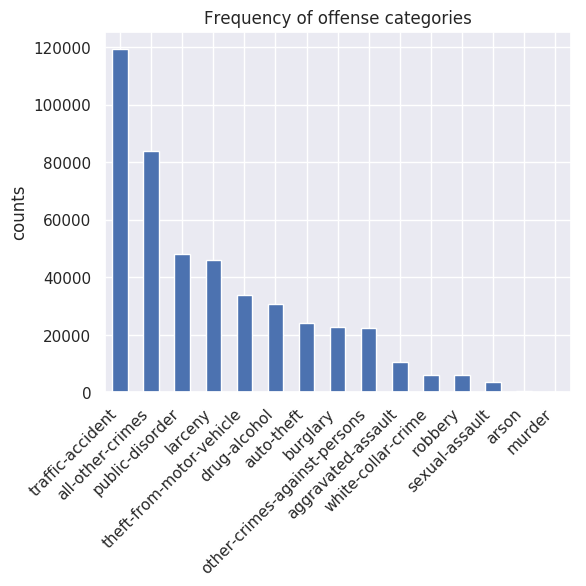

In [21]:
# initialize the pyplot figure ("canvas")
plt.figure(num=None, figsize =(6, 6), dpi=100, facecolor='w', edgecolor='k')

# because the data are now held in a pandas Series object, 
# we can generate by plot simply by calling a method on the object
# this (pandas) function creates a matplotlib plot
counts.plot.bar()

# set the seaborn style
sns.set_style('darkgrid')
sns.set_palette('deep')

# add labels
plt.title('Frequency of offense categories')
plt.ylabel('counts', size=12)

# format the ticks on the x axis
plt.xticks(rotation=45, ha='right')

# set the layout
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

#display the plot
fig = plt.gcf()
plt.show()

## Save Visualizations to File

In [22]:
output_file = "offenses.png"
fig.savefig(os.path.join(conf.dirs.output, output_file), dpi=600)

## Process
No one expects you to have this code memorized! **Documentation is a programmer's best friend**. Read the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), [matplotlib documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html), the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot), and search StackOverflow.

## Exploring further
* What do this visualization tell us? 
* In what ways does it mislead us? 
* How could we expand or refine this visualization?
* What other questions can we ask of the data?
* What's another visualization we could make right now?